# Project 1

## Part A

### 0) We ask you to create a folder for you project, in which you will be working on the project. You will be asked to send us this project that we can look at your progress and browse through your work. Please follow the instructions in the seminar or a documentation of julia about the activation of an environment and use it for your project. (It can be found also here: https://pkgdocs.julialang.org/v1/environments/ even it is from prompt/terminal, in a notebook use `Pkg.activate(".")`) 
* In your project, you will be adding packages, using them, you can create a script files as well and load them (with helper functions if needed.)

In [3]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Documents/fin_econometrics_2/project1`


In [120]:
Pkg.instantiate()
Pkg.status()

Status `~/Documents/fin_econometrics_2/project1/Project.toml`
  [6d3278bc] ARCHModels v2.3.4
  [fbb218c0] BSON v0.3.7
  [ad839575] Blink v0.12.8
  [336ed68f] CSV v0.10.11
  [a93c6f00] DataFrames v1.6.1
⌃ [1313f7d8] DataFramesMeta v0.14.0
⌃ [31c24e10] Distributions v0.25.102
  [587475ba] Flux v0.14.6
⌃ [38e38edf] GLM v1.8.3
  [c601a237] Interact v0.10.5
  [945b72a4] MarketData v0.13.12
  [429524aa] Optim v1.7.8
  [91a5bcdd] Plots v1.39.0
  [ce6b1742] RDatasets v0.7.7
  [b0e4dd01] RollingFunctions v0.8.0
⌅ [2913bbd2] StatsBase v0.33.21
  [f3b207a7] StatsPlots v0.15.6
  [bd369af6] Tables v1.11.1
  [9e3dc215] TimeSeries v0.23.2
  [e88e6eb3] Zygote v0.6.67
  [37e2e46d] LinearAlgebra
  [10745b16] Statistics v1.9.0
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


### 1) Use package `MarketData`, `Quandl`, or different one, if needed go to their github pages and `docs`, then **download data for an asset** of your choice.

In [5]:
using MarketData, Dates

In [6]:
PFE = yahoo("PFE", YahooOpt(period1 = DateTime(2019, 1, 1), period2 = now()))

1226×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2019-01-02 to 2023-11-13
│            │ Open    │ High    │ Low     │ Close   │ AdjClose │ Volume      │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼─────────────┤
│ 2019-01-02 │ 40.9108 │ 41.2713 │ 40.4554 │ 41.0342 │ 33.8926  │ 2.6430315e7 │
│ 2019-01-03 │ 41.0247 │ 41.1195 │ 39.8008 │ 39.8861 │ 32.9444  │ 2.8503533e7 │
│ 2019-01-04 │ 40.2657 │ 41.129  │ 40.0949 │ 40.797  │ 33.6967  │ 2.7145348e7 │
│ 2019-01-07 │ 40.8634 │ 41.3852 │ 40.6641 │ 41.0152 │ 33.8769  │ 2.0995469e7 │
│ 2019-01-08 │ 41.3283 │ 41.4611 │ 40.9393 │ 41.2049 │ 34.0337  │ 1.9677231e7 │
│ 2019-01-09 │ 41.2334 │ 41.4326 │ 40.9867 │ 41.1195 │ 33.9631  │ 2.010758e7  │
│ 2019-01-10 │ 41.0057 │ 41.0152 │ 39.8767 │ 40.1423 │ 33.156   │ 3.9731162e7 │
│ 2019-01-11 │ 40.1613 │ 40.6831 │ 39.9905 │ 40.6831 │ 33.6027  │ 2.1064506e7 │
│ ⋮          │ ⋮       │ ⋮       │ ⋮       │ ⋮       │ ⋮        │ ⋮           │
│ 2023-11-03 │ 30.9    │ 31.39   │ 30.84   

### 2) Use plot to look at the data, do some summary statistics, `Statistics`, `DataFrames`, `StatsPlots` packages


In [7]:
using Statistics, DataFrames, StatsPlots, TimeSeries, RollingFunctions, DataFramesMeta, KernelDensity

In [8]:
df = DataFrame(PFE)
df = @transform(df, :returns = [NaN; diff(log.(:Close))])
df = @transform(df, :volatility = runstd(:returns, 30))
df = df[31:end,:]

Row,timestamp,Open,High,Low,Close,AdjClose,Volume,returns,volatility
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2019-02-14,39.5636,39.962,39.4877,39.8197,33.1768,1.98649e7,0.0064539,0.0155556
2,2019-02-15,40.2087,40.3321,39.9241,40.2277,33.5167,1.9169e7,0.0101933,0.0147902
3,2019-02-19,40.0759,40.6641,40.0285,40.4175,33.6748,2.4433e7,0.00470593,0.0142098
4,2019-02-20,40.351,40.3795,39.7818,40.038,33.3586,2.73549e7,-0.00943402,0.0142632
5,2019-02-21,39.8672,40.1518,39.7154,39.981,33.3112,1.96119e7,-0.00142281,0.0142266
6,2019-02-22,40.1328,40.9203,40.0569,40.759,33.9594,2.47793e7,0.019272,0.0146973
7,2019-02-25,40.8349,41.148,40.74,40.8729,34.0542,2.52748e7,0.00278935,0.0140016
8,2019-02-26,40.759,41.0152,40.6072,40.8159,34.0068,1.6549e7,-0.00139366,0.0137949
9,2019-02-27,40.778,41.0057,40.6167,40.7305,33.9357,1.64751e7,-0.00209432,0.0136135


In [9]:
stats = describe(df, :detailed)
println(stats)

9×11 DataFrame
 Row │ variable    mean          std        min         q25         median        q75         max         nunique  nmissing  eltype   
     │ Symbol      Union…        Union…     Any         Union…      Union…        Union…      Any         Union…   Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ timestamp                            2019-02-14                                        2023-11-13  1196            0  Date
   2 │ Open        40.6713       6.68627    27.2865     35.6452     39.135        45.3925     60.6                        0  Float64
   3 │ High        41.089        6.82699    28.0645     35.9675     39.51         45.9075     61.71                       0  Float64
   4 │ Low         40.2287       6.58276    26.4516     35.3297     38.865        44.975      59.83                       0  Float64
   5 │ Close       40.6545       6.72664    27.0304

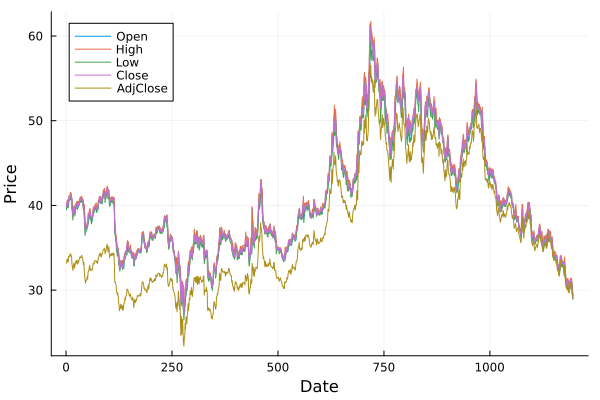

In [10]:
plot()
@df df plot!(:Open, label="Open")
@df df plot!(:High, label="High")
@df df plot!(:Low, label="Low")
@df df plot!(:Close, label="Close")
@df df plot!(:AdjClose, label="AdjClose")

plot!(
    legend=:topleft,
    xlabel="Date",
    ylabel="Price"
)

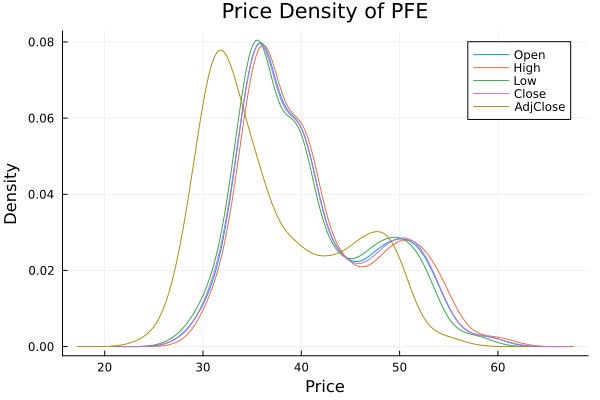

In [11]:
plot()
@df df density!(:Open, label="Open")
@df df density!(:High, label="High")
@df df density!(:Low, label="Low")
@df df density!(:Close, label="Close")
@df df density!(:AdjClose, label="AdjClose")

plot!(
    legend=:topright,
    xlabel="Price",
    ylabel="Density",
    title = "Price Density of PFE"
)

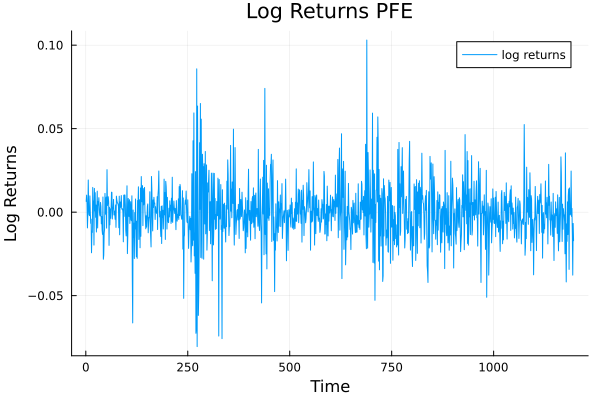

In [12]:
plot()
@df df plot(:returns, label="log returns")

plot!(
    legend=:topright,
    xlabel="Time",
    ylabel="Log Returns",
    title = "Log Returns PFE"
)

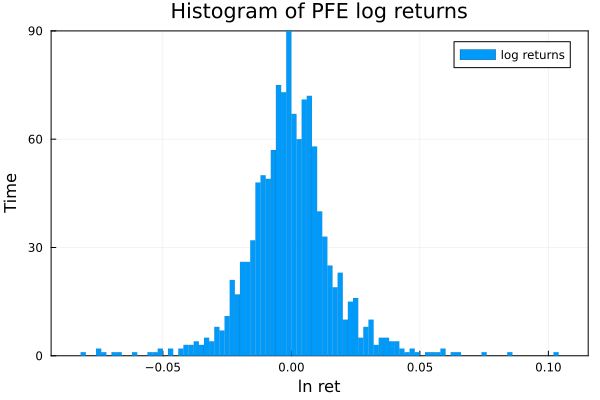

In [13]:
plot()
@df df histogram(:returns, l=0, framestyle=:box, label="log returns", bins = 100)

plot!(
    legend=:topright,
    xlabel="ln ret",
    ylabel="Time",
    title = "Histogram of PFE log returns"
)

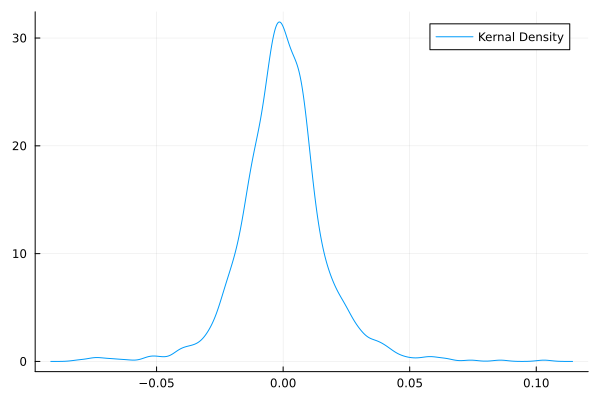

In [14]:
plot(kde(df[:, :returns]), label="Kernal Density")

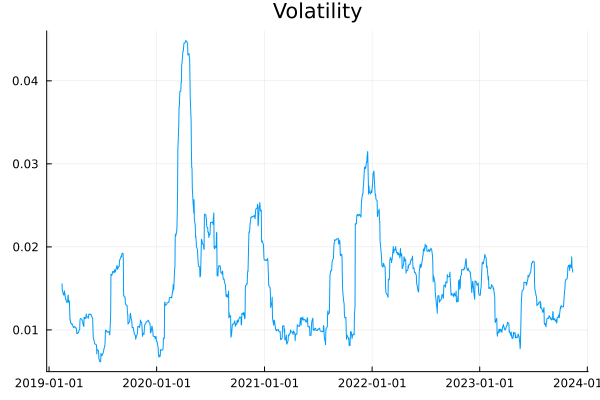

In [15]:
plot(df.timestamp, df.volatility, title = "Volatility", legend=false)

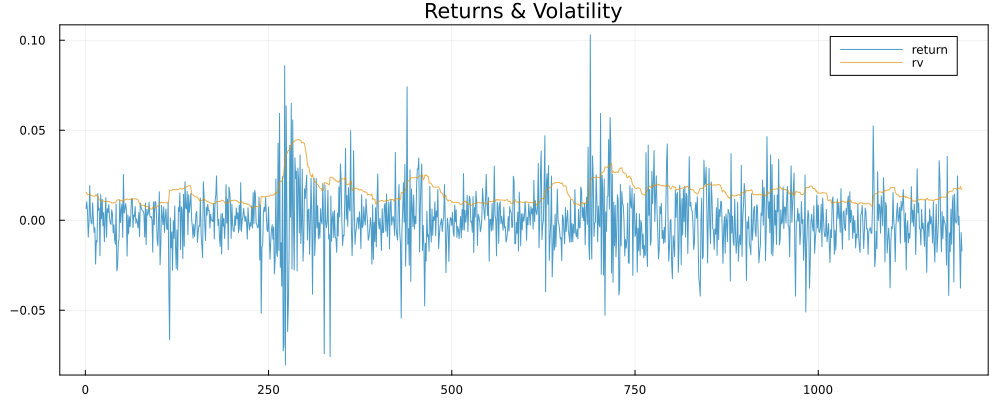

In [16]:
p1 = plot(df[:, :returns], line=(1., 0.7, :solid), label="return", palette=:seaborn_colorblind, size=(1000,400))
p1 = plot!(df[:, :volatility], line=(1., 0.7, :solid), label="rv", framestyle=:box, title = "Returns & Volatility")

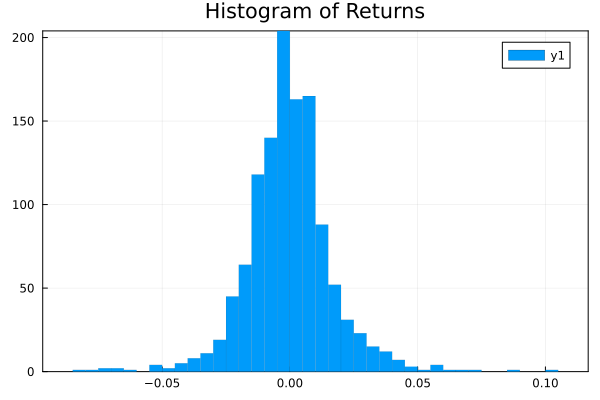

In [17]:
p2 = histogram(df[:, :returns], l=0, framestyle=:box, title = "Histogram of Returns")

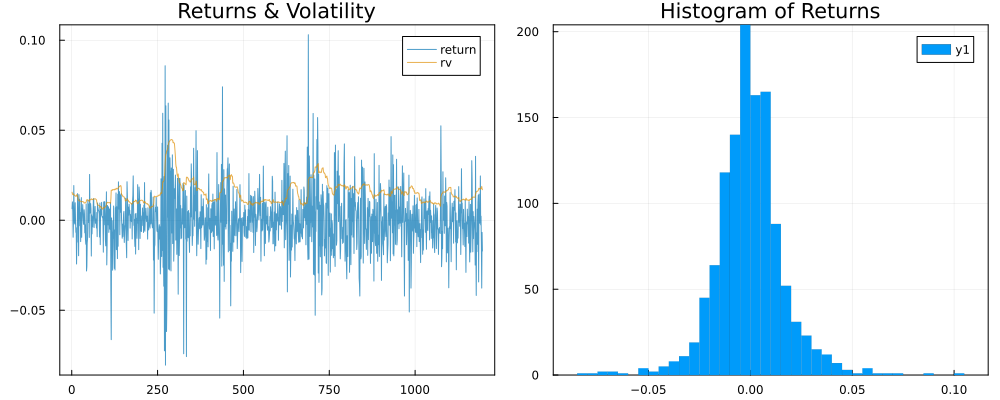

In [18]:
plot(p1, p2, size=(1000,400))

In [19]:
returns = df[:, :returns]
returns = returns[2:end]

1195-element Vector{Float64}:
  0.010193294197318181
  0.004705932701643878
 -0.00943401605152916
 -0.0014228127133386614
  0.019272026104818707
  0.00278935329204133
 -0.0013936550843984818
 -0.002094315309264072
  0.009735846255288116
  0.0002306377162497597
  ⋮
 -0.0016374328472279487
 -0.0003278151152121822
  0.02461264137996455
 -0.002562461363699864
  0.0022425125527800738
 -0.013855546290440834
 -0.037690411592790074
 -0.0067613509780439784
 -0.017106130428599542

In [20]:
size(returns)

(1195,)

In [21]:
# empty array
plots_array = []
# loop
for t in 1:250:1000
    p0 = plot(returns[t:t+200-1], l=(0.5,0.7), title="sub-sample $(t:t+200-1)", label="")
    push!(plots_array, p0) # this pushes = adds plot p0 into the array to store it
end

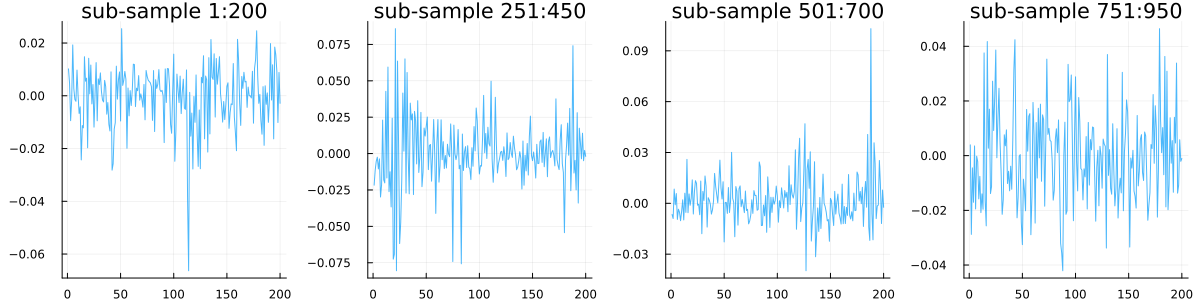

In [22]:
plot(plots_array..., layout=(1,:), size=(1200,300))

In [23]:
# empty array
subsample_array = []
# loop
for t in 1:250:1000
    push!(subsample_array, returns[t:t+200-1]) # this pushes = adds plot p0 into the array to store it
end

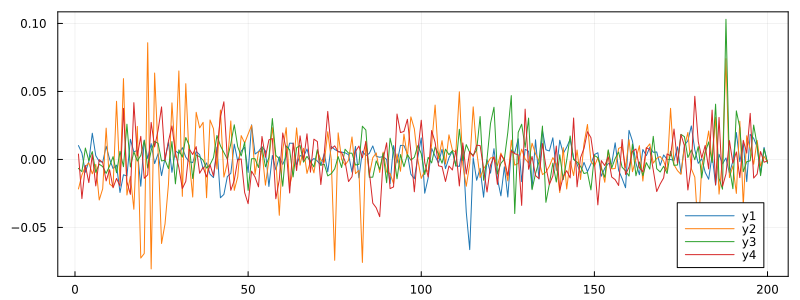

In [24]:
plot(subsample_array, size=(800,300), framestyle=:box, palette=:tab10)

### 3) Use `ARCHModels.jl` to **model** asset data and **forecast**.

#### GARCH

Univariate GARCH (p, q) model:

$\sigma_t^2 = \omega + \sum_{i=1}^p \alpha_i \epsilon_{t-1}^2 + \sum_{i=1}^q \beta_i \sigma_{t-i}^2$

In [25]:
using ARCHModels

In [26]:
candidate_p = [1, 2]
candidate_q = [1, 2]

best_aic = Inf
best_model = nothing

for p in candidate_p
    for q in candidate_q
        model = fit(GARCH{p, q}, returns)
        aic = StatsBase.aic(model) 
        
        println("GARCH($p, $q) - AIC: $aic")
        
        if aic < best_aic
            best_aic = aic
            best_model = model
        end
    end
end

GARCH(1, 1) - AIC: -6584.825747097188


GARCH(1, 2) - AIC: -6579.24396743117


GARCH(2, 1) - AIC: -6582.753648356576


GARCH(2, 2) - AIC: -6580.7375497493595


In [27]:
garch_fit = fit(GARCH{1, 2}, returns)


GARCH{1, 2} model with Gaussian errors, T=1195.

Mean equation parameters:
────────────────────────────────────────────────
       Estimate    Std.Error   z value  Pr(>|z|)
────────────────────────────────────────────────
μ  -0.000118519  0.000426958  -0.27759    0.7813
────────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────────
       Estimate   Std.Error      z value  Pr(>|z|)
──────────────────────────────────────────────────
ω   1.94384e-5   1.70464e-5  1.14032        0.2542
β₁  0.807059     0.114307    7.06044        <1e-11
α₁  0.117934     0.0529822   2.22592        0.0260
α₂  4.27642e-50  0.0828488   5.16172e-49    1.0000
──────────────────────────────────────────────────


predict the conditional variances for the next three time steps for the GARCH(1,2)

In [28]:
predict.(garch_fit, :variance, 1:3)

3-element Vector{Float64}:
 0.00030880329787959454
 0.00030507936322772956
 0.0003016347488776902

#### HAR

Calculating daily, weekly and monthly Realized Volatilities:

In [29]:
function HAR_regressors(data)

    RVd = data[22:end-1] # days
    RVw = zeros(length(RVd)) # weeks
    for i in 22:(length(data)-1)
       temp = 0
       for h in 0:4
           temp = temp + data[i-h]
       end
       RVw[i-21]= temp / 5
    end
    
    RVm = zeros(length(RVd)) # months
    for i in 22:(length(data)-1) 
       temp = 0
       for h in 0:21
           temp = temp + data[i-h]
       end
       RVm[i-21] = temp / 22;
    end

    return [RVd RVw RVm]
end

HAR_regressors (generic function with 1 method)

##### OLS Estimator

$X′X\beta=X′y$

In [30]:
function OLSestimatorconst(y,x)
    x = [ones(size(x)[1]) x]
    return (transpose(x) * x) \ (transpose(x) * y)
end

OLSestimatorconst (generic function with 1 method)

In [31]:
OLSestimatorconst(returns[23:end], HAR_regressors(returns))

4-element Vector{Float64}:
 -0.0002513265939860532
 -0.09195633059683478
  0.13650987237995946
  0.08760048904043327

The estimated coefficients are as follows:

- The intercept ($\beta_0$​): approximately -0.000239
- Coefficient for RVd ($\beta_1$): approximately -0.0916
- Coefficient for RVw ($\beta_2$): approximately 0.1341
- Coefficient for RVm ($\beta_3$): approximately 0.0851

In [32]:
using GLM

In [40]:
data_har = DataFrame([returns[23:end] HAR_regressors(returns)], [:rv_t, :rv_d, :rv_w, :rv_m]);

In [41]:
har = lm(@formula(rv_t ~ rv_d + rv_w + rv_m), data_har)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

rv_t ~ 1 + rv_d + rv_w + rv_m

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.000251327  0.000494916  -0.51    0.6117  -0.00122235   0.000719697
rv_d         -0.0919563    0.0327843    -2.80    0.0051  -0.156279    -0.0276337
rv_w          0.13651      0.0842438     1.62    0.1054  -0.0287761    0.301796
rv_m          0.0876005    0.148944      0.59    0.5565  -0.204627     0.379828
──────────────────────────────────────────────────────────────────────────────────

- $\beta_0$​ (Intercept): -0.000239148
- $\beta_1\beta_1$​ (rv_d): -0.0916349
- $\beta_2\beta_2​$ (rv_w): 0.134067
- $\beta_3\beta_3​$ (rv_m): 0.0851113

In [42]:
har_prediction = GLM.predict(har); # fit

In [43]:
data = select(df, [:timestamp, :returns])
data = data[2:end, :]

Row,timestamp,returns
,Date,Float64
1,2019-02-15,0.0101933
2,2019-02-19,0.00470593
3,2019-02-20,-0.00943402
4,2019-02-21,-0.00142281
5,2019-02-22,0.019272
6,2019-02-25,0.00278935
7,2019-02-26,-0.00139366
8,2019-02-27,-0.00209432
9,2019-02-28,0.00973585


### 4) **Plot** forecasts.


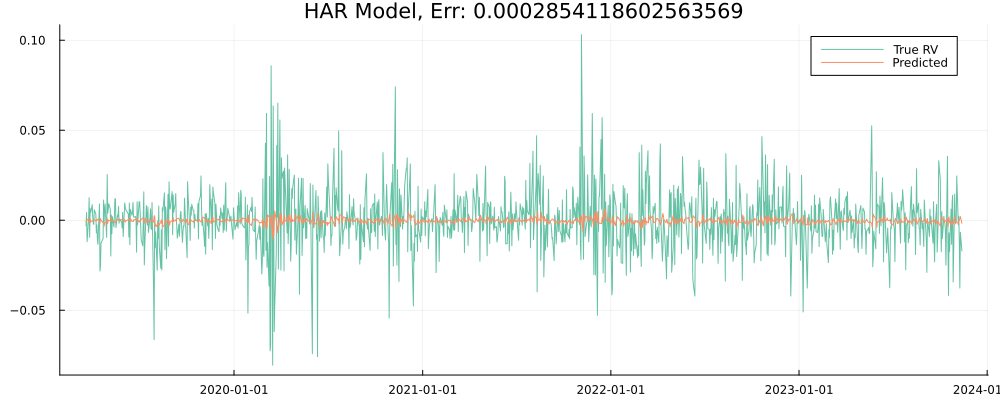

In [44]:
p1 = plot(data[23:end,:timestamp], data_har.rv_t, lab="True RV", leg=:topright, 
    title="HAR Model, Err: $(mean(abs2, data_har.rv_t - har_prediction))", palette=:Set2_3)
p1 = plot!(data[23:end,:timestamp], har_prediction, lab="Predicted", size=(1000,400))

In [45]:
predictors = HAR_regressors(returns);

In [46]:
describe(DataFrame(predictors, [:rv_d, :rv_w, :rv_m]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,rv_d,-0.000253053,-0.0805014,-0.000731059,0.103055,0,Float64
2,rv_w,-0.000222638,-0.0333083,-4.34539e-5,0.0324366,0,Float64
3,rv_m,-0.000218266,-0.0104868,-0.000378566,0.0115184,0,Float64


## Part B

### - *OLS* vs *ML* estimation HAR
    - Estimate coefficients with different approaches
    - Optim.jl vs Flux.jl
    - Discuss coefficients, show them in scatter, histograms
    - test different activations in NN
    - play around with regularizations
    - Make Q-Q plots, a table of performance

In [62]:
using Optim
using Distributions

In [71]:
function har_model(params, data)
    # Extract parameters
    beta0, beta1, beta2, beta3 = params
    
    # Extract data
    rv_d, rv_w, rv_m, rv_t = data[:, 2], data[:, 3], data[:, 4], data[:, 1]
    
    # Calculate predicted values
    y_pred = beta0 .+ beta1 .* rv_d .+ beta2 .* rv_w .+ beta3 .* rv_m
    
    # Calculate residuals
    residuals = rv_t .- y_pred
    
    # Calculate standard deviation of residuals
    std_residuals = std(residuals)
    
    # Calculate log-likelihood using the normal distribution formula
    log_likelihood = sum(-0.5 * log(2π) .- log(std_residuals) .- 0.5 * (residuals / std_residuals).^2)
    
    return -log_likelihood  # Minimize the negative log-likelihood
end


har_model (generic function with 1 method)

In [96]:
# Initial parameter guess
initial_params = [0.0, 0.0, 0.0, 0.0]

# Optimize
result = optimize(params -> har_model(params, data_har), initial_params, LBFGS())

# Extract the estimated parameters
estimated_params = Optim.minimizer(result)

4-element Vector{Float64}:
 -0.00025132659401900186
 -0.09195633051809705
  0.13650987154212543
  0.08760049069317073

- The intercept ($\beta_0$​): approximately -0.00025132659401900186
- Coefficient for RVd ($\beta_1$): approximately -0.09195633051809705
- Coefficient for RVw ($\beta_2$): approximately -0.13650987154212543
- Coefficient for RVm ($\beta_3$): approximately 0.08760049069317073

Now let's compare the betas from previously derived OLS as well as the newly obtained betas from ML using Optim.jl:

| Coeff.        | OLS                    | ML
|---------------|------------------------|-------------------------|
| $\beta_0$     | -0.0002513265939860532 | -0.00025132659401900186 |
| $\beta_1$     | -0.09195633059683478   | -0.09195633051809705    | 
| $\beta_2$     | 0.13650987237995946    | 0.13650987154212543     |
| $\beta_3$     | 0.08760048904043327    | 0.08760049069317073     |

We can clearly tell that they are almost identical. 

In [97]:
function predict_har(params, features)
    intercept, coeff1, coeff2, coeff3 = params
    return intercept .+ coeff1 .* features[!, 1] .+ coeff2 .* features[!, 2] .+ coeff3 .* features[!, 3]
end

# Assuming data_har is a DataFrame with lagged volatility values
features = select(data_har, [:rv_d, :rv_w, :rv_m])

# Predict volatility
predicted_volatility = predict_har(estimated_params, features)


1173-element Vector{Float64}:
 -0.000921175754098588
  0.00011384618183923455
  9.181375169186942e-5
  0.0008533480900683518
 -0.00031067545014715285
 -0.0013805013805102272
  0.0004234000087573251
 -0.0009471625284284029
 -0.0002832775908109531
 -0.000483856955372741
  ⋮
 -0.0004913617098866702
 -0.0007211398331921236
 -0.001226511566008424
 -0.0017442035296232076
  0.0002593978909894289
 -8.057510529546277e-5
  0.0010025898102553434
  0.0020278067411675553
 -0.0016926019662861773

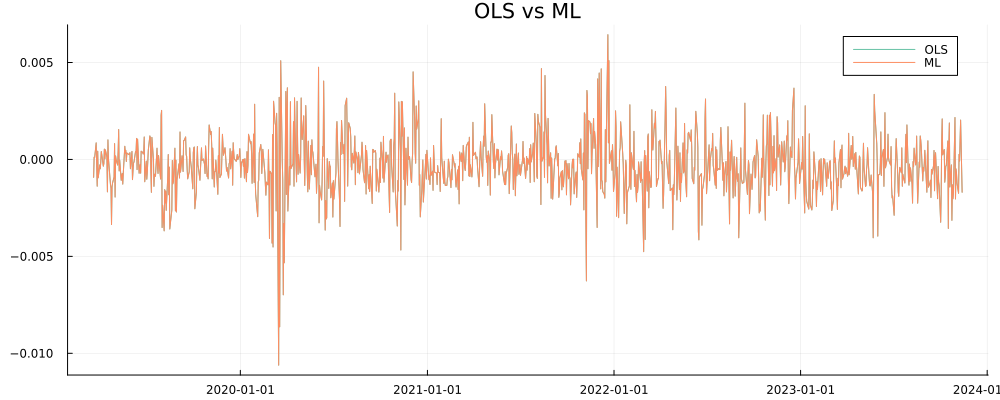

In [98]:
p2 = plot(data[23:end,:timestamp], har_prediction, lab="OLS", leg=:topright, 
    title="OLS vs ML", palette=:Set2_3)
p2 = plot!(data[23:end,:timestamp], predicted_volatility, lab="ML", size=(1000,400))

-------

In [121]:
using Flux
using Flux: params, mse, gradient, update!

In [122]:
size(returns), size(predictors)

((1195,), (1173, 3))

In [126]:
xtrain = predictors[1:900,:] |> permutedims .|> Float32
ytrain = returns[23:922] |> permutedims .|> Float32
xvalid = predictors[901:1100,:] |> permutedims .|> Float32
yvalid = returns[923:1122] |> permutedims .|> Float32;

In [127]:
size(xtrain), size(ytrain), size(xvalid), size(yvalid)

((3, 900), (1, 900), (3, 200), (1, 200))

In [138]:
typeof(xtrain)

Matrix{Float32} (alias for Array{Float32, 2})

In [139]:
xtrain

3×900 Matrix{Float32}:
 0.0116516    -0.00307805    0.0042594    …  -0.0135603    0.00406354
 0.00271336    0.000760273   0.00555459      -0.0111334   -0.0117654
 0.000356003  -0.00024724   -0.000267537     -0.00546131  -0.00600451

In [129]:
using Plots
using Plots.Measures
gr(; fmt = "svg", dpi=72, fontfamily="Arial", framestyle=:box, size=(500 * 1.618, 500), thickness_scaling = 1.1, palette=:seaborn_colorblind, margin=3mm)

Plots.GRBackend()

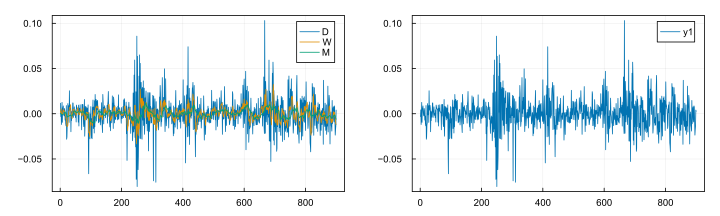

In [130]:
plot(plot(xtrain', labels=["D" "W" "M"]), plot(ytrain'), size=(1000,300))

In [136]:
function our_train(x_train, y_train, x_valid, y_valid; nodes=[5,2], eta=0.001, n_epochs=100)
    # _ data
    # xtrain (3, T)
    # ytrain (1, T)
    
    # _ model
    neural_net = Chain(
                        Dense(size(x_train,1),  nodes[1]),
                        Dense(nodes[1], nodes[2]),
                        Dense(nodes[2], size(y_train,1)),
    )
    
    # _ loss
    loss(x, y) = Flux.Losses.mse(neural_net(x), y)
    
    # _ optimization
    opt = Descent(eta)
    # _ opt = ADAM(eta)
    
    # _ params 
    my_params = Flux.params(neural_net)
    orig_params = deepcopy(my_params)
    
    # _ reporting 
    losses_train = []
    losses_valid = []
    
    # _ Train loop over the data
    for epoch in 1:n_epochs
        # training
        Flux.train!(loss, my_params, [(x_train, y_train)], opt)
        # reporting
        push!(losses_train, loss(x_train, y_train))
        push!(losses_valid, loss(x_valid, y_valid))
        epoch % 20 == 0 ? println("Epoch $epoch \t Loss: ", losses_train[end], " \t Test: ", losses_valid[end]) : nothing
    end
    
    return neural_net, losses_train, losses_valid
end

our_train (generic function with 1 method)

In [137]:
model_trained0, losses01, losses02 = our_train(xtrain, ytrain, xvalid, yvalid; nodes=[50,50], eta=0.001, n_epochs=100);

UndefVarError: UndefVarError: `Chain` not defined

In [105]:
Pkg.activate()

  Activating project at `~/.julia/environments/v1.9`
